In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gridExtra)
library(grid)
library(plyr)

# Load the dataset
iris=read.csv('../input/Iris.csv')


# First let's get a random sampling of the data
iris[sample(nrow(iris),10),]



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,28,5.2,3.5,1.5,0.2,Iris-setosa
115,115,5.8,2.8,5.1,2.4,Iris-virginica
143,143,5.8,2.7,5.1,1.9,Iris-virginica
15,15,5.8,4.0,1.2,0.2,Iris-setosa
79,79,6.0,2.9,4.5,1.5,Iris-versicolor
81,81,5.5,2.4,3.8,1.1,Iris-versicolor
65,65,5.6,2.9,3.6,1.3,Iris-versicolor
17,17,5.4,3.9,1.3,0.4,Iris-setosa
54,54,5.5,2.3,4.0,1.3,Iris-versicolor


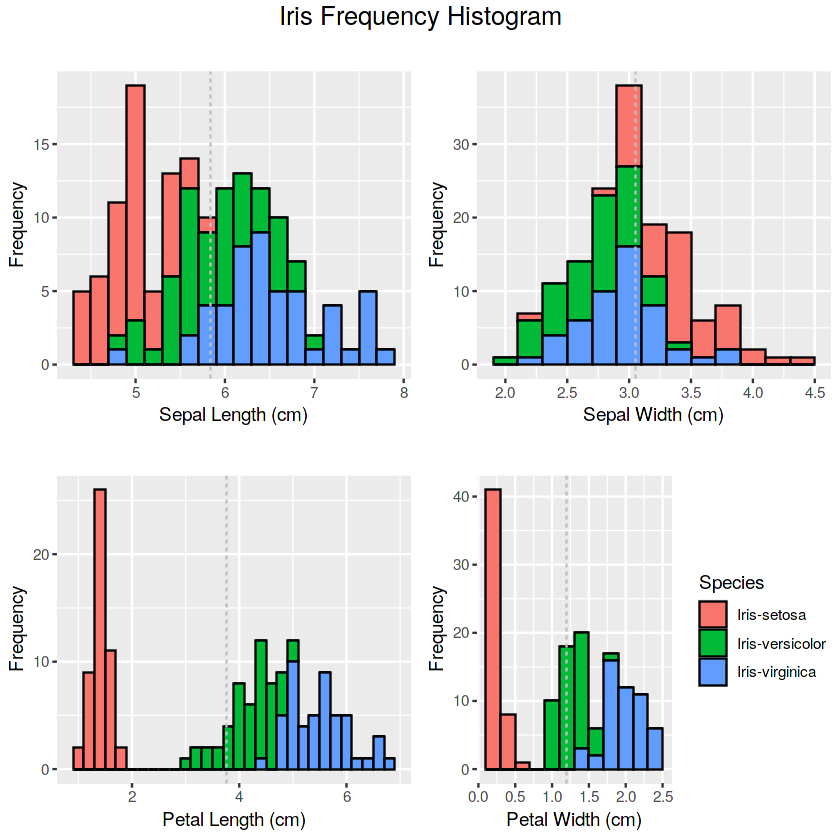

In [2]:

# Density & Frequency analysis with the Histogram,

# Sepal length 
HisSl <- ggplot(data=iris, aes(x=SepalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Length")+
  geom_vline(data=iris, aes(xintercept = mean(SepalLengthCm)),linetype="dashed",color="grey")


# Sepal width
HistSw <- ggplot(data=iris, aes(x=SepalWidthCm)) +
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Width")+
  geom_vline(data=iris, aes(xintercept = mean(SepalWidthCm)),linetype="dashed",color="grey")


# Petal length
HistPl <- ggplot(data=iris, aes(x=PetalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Petal Length")+
  geom_vline(data=iris, aes(xintercept = mean(PetalLengthCm)),
             linetype="dashed",color="grey")



# Petal width
HistPw <- ggplot(data=iris, aes(x=PetalWidthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="right" )+
  ggtitle("Histogram of Petal Width")+
  geom_vline(data=iris, aes(xintercept = mean(PetalWidthCm)),linetype="dashed",color="grey")


# Plot all visualizations
grid.arrange(HisSl + ggtitle(""),
             HistSw + ggtitle(""),
             HistPl + ggtitle(""),
             HistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Frequency Histogram", 
                            gp=gpar(fontsize=15))
)

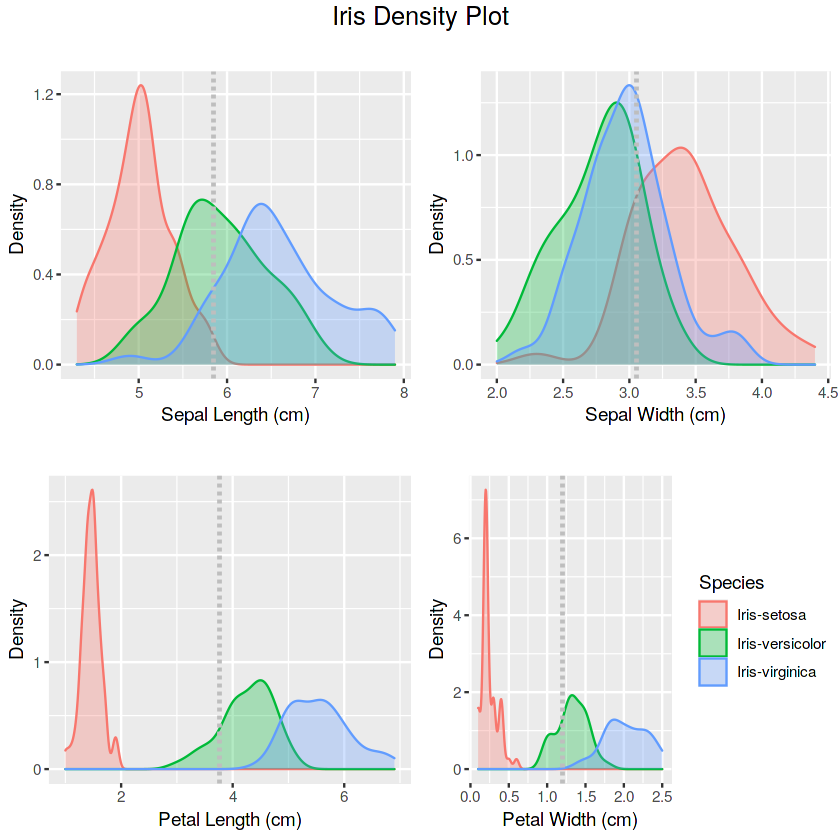

In [3]:
# Notice the shape of the data, most attributes exhibit a normal distribution. 
# You can see the measurements of very small flowers in the Petal width and length column.


# We can review the density distribution of each attribute broken down by class value. 
# Like the scatterplot matrix, the density plot by class can help see the separation of classes. 
# It can also help to understand the overlap in class values for an attribute.

DhistPl <-    ggplot(iris, aes(x=PetalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalLengthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")

DhistPw <- ggplot(iris, aes(x=PetalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalWidthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Width (cm)") +  
  ylab("Density")
  


DhistSw <- ggplot(iris, aes(x=SepalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalWidthCm),  colour=Species), linetype="dashed",color="grey", size=1)+
  xlab("Sepal Width (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


DhistSl <- ggplot(iris, aes(x=SepalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalLengthCm),  colour=Species),linetype="dashed", color="grey", size=1)+
  xlab("Sepal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


# Plot all density visualizations
grid.arrange(DhistSl + ggtitle(""),
             DhistSw  + ggtitle(""),
             DhistPl + ggtitle(""),
             DhistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Density Plot", 
                            gp=gpar(fontsize=15))
)

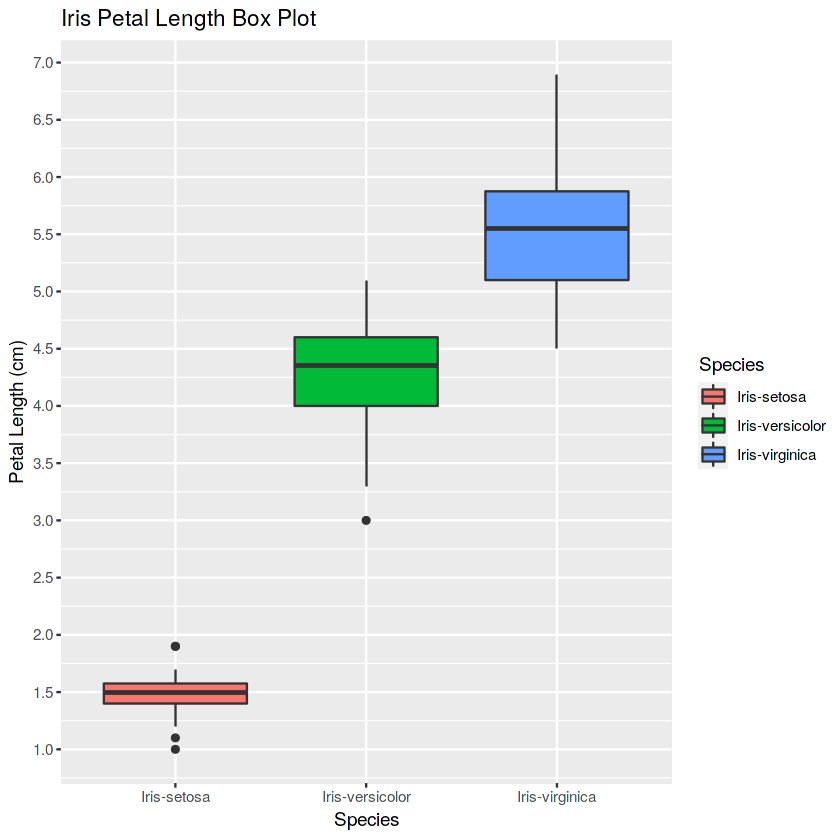

In [4]:


# Next with the bloxplot we will identify some outliers. As you can see some classes do not overlap at all (e.g. Petal Length) 
# where as with other attributes there are hard to tease apart (Sepal Width).

ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
  geom_boxplot()+
  scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Petal Length Box Plot", x = "Species")

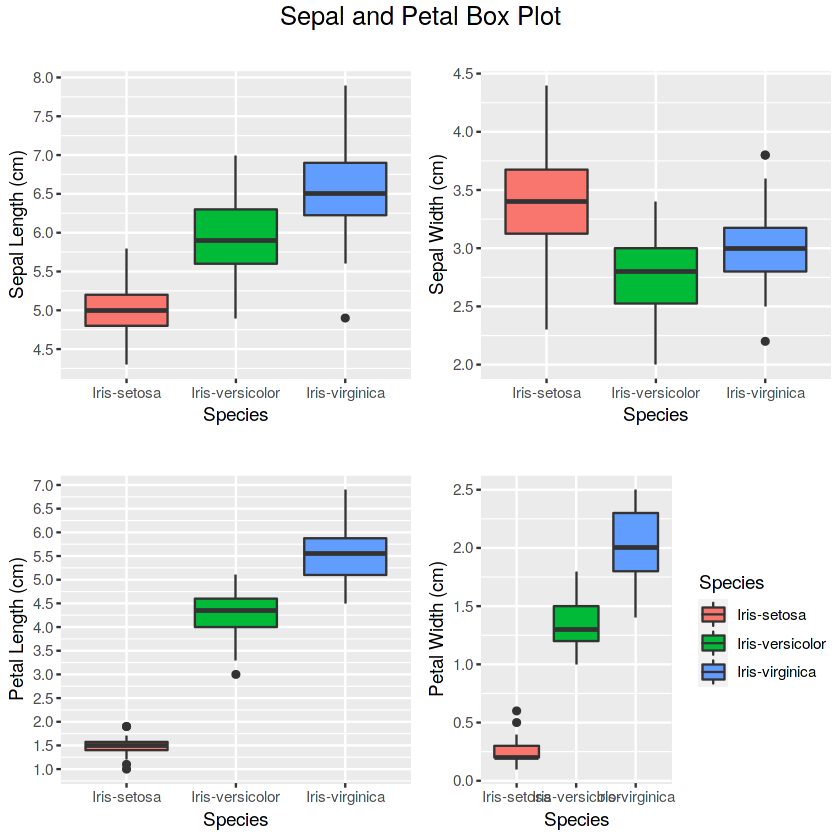

In [5]:
# Let's plot all the variables in a single visualization that will contain all the boxplots


BpSl <- ggplot(iris, aes(Species, SepalLengthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Sepal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")



BpSw <-  ggplot(iris, aes(Species, SepalWidthCm, fill=Species)) + 
          geom_boxplot()+
          scale_y_continuous("Sepal Width (cm)", breaks= seq(0,30, by=.5))+
          theme(legend.position="none")



BpPl <- ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")
        


BpPw <-  ggplot(iris, aes(Species, PetalWidthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Width (cm)", breaks= seq(0,30, by=.5))+
        labs(title = "Iris Box Plot", x = "Species")



# Plot all visualizations
grid.arrange(BpSl  + ggtitle(""),
             BpSw  + ggtitle(""),
             BpPl + ggtitle(""),
             BpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Box Plot", 
                            gp=gpar(fontsize=15))
)

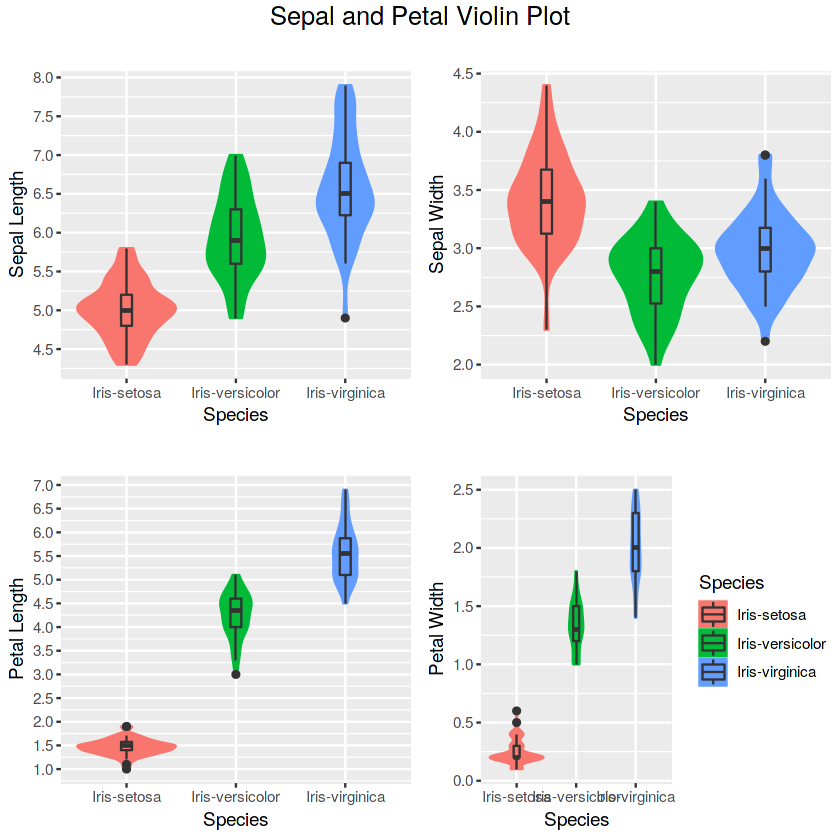

In [6]:
# You can also visualize the data using the violin plots. They are similar to the Box Plots but they 
# show the number of points at a particular value by the width of the shapes. 
# The can also include the marker for the median and a box for the interquartile range.


VpSl <-  ggplot(iris, aes(Species, SepalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")

VpSw <-  ggplot(iris, aes(Species, SepalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
  


VpPl <-  ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
        



VpPw <-  ggplot(iris, aes(Species, PetalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        labs(title = "Iris Box Plot", x = "Species")
  

# Plot all visualizations
grid.arrange(VpSl  + ggtitle(""),
             VpSw  + ggtitle(""),
             VpPl + ggtitle(""),
             VpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Violin Plot", 
                            gp=gpar(fontsize=15))
)


`geom_smooth()` using formula 'y ~ x'

Loading required package: carData



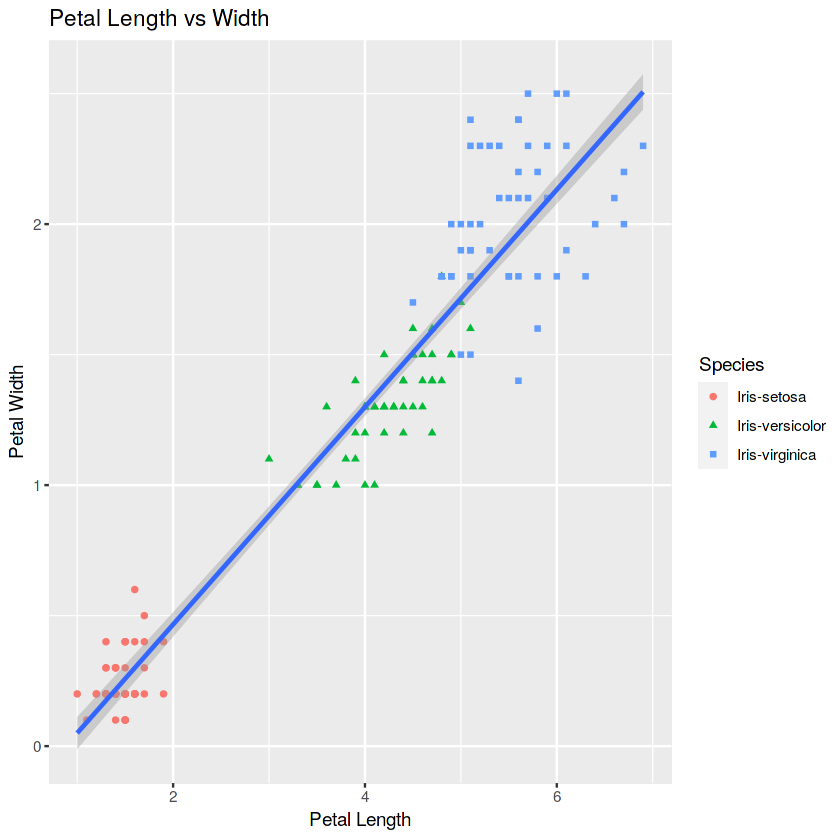

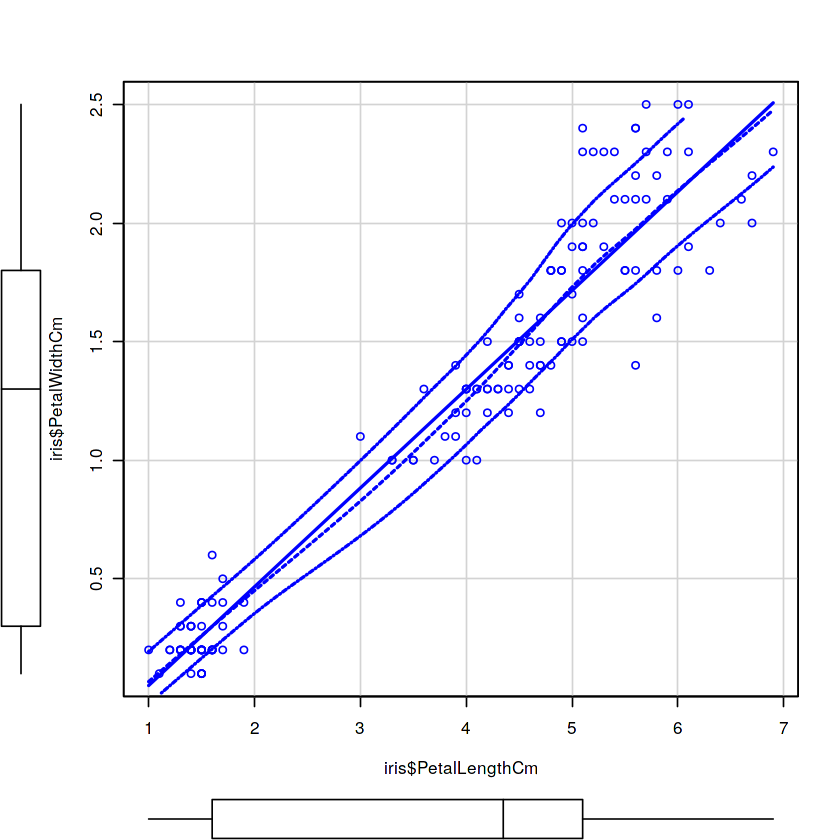

In [7]:

# Now let's create a scatterplot of petal lengths versus petal widths with the color & shape by species. 
# There is also a regression line with a 95% confidence band.
# Notice the petal length of the setosa is clearly a differenciated cluster so it will be a good predictor for ML.

ggplot(data = iris, aes(x = PetalLengthCm, y = PetalWidthCm))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


# Here is a similar plot with more details on the regression line.
library(car)
scatterplot(iris$PetalLengthCm,iris$PetalWidthCm)


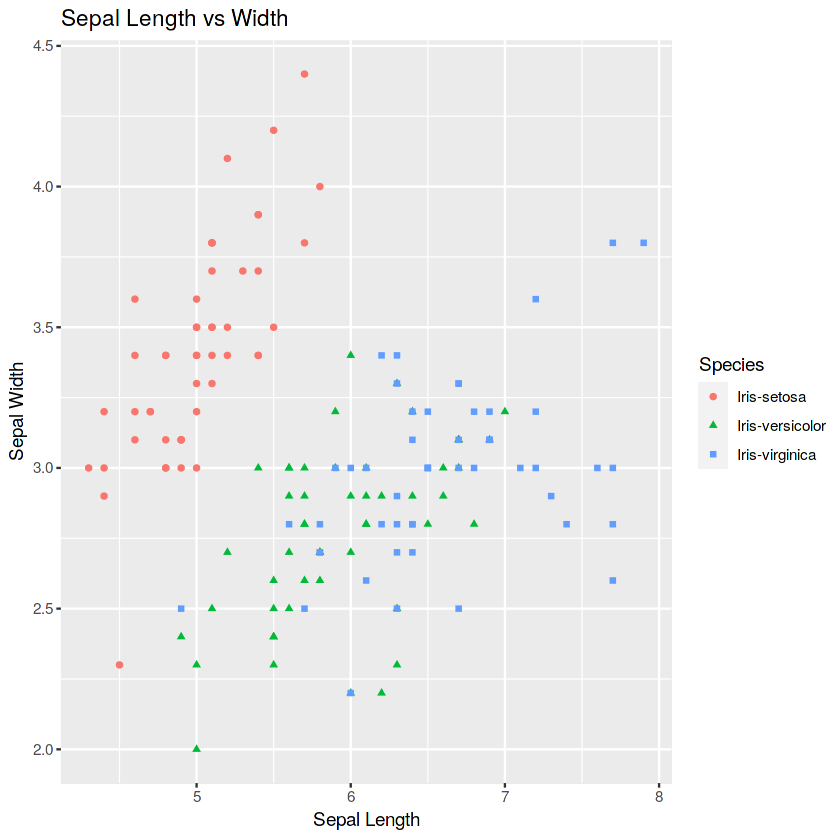

In [8]:

# Now check the Sepal Length vs Width. Notice the sepal of the Virginica and Versicolor species is more mixed, this feature might not be a good predictor.
ggplot(data=iris, aes(x = SepalLengthCm, y = SepalWidthCm)) +
  geom_point(aes(color=Species, shape=Species)) +
  xlab("Sepal Length") + 
  ylab("Sepal Width") +
  ggtitle("Sepal Length vs Width")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



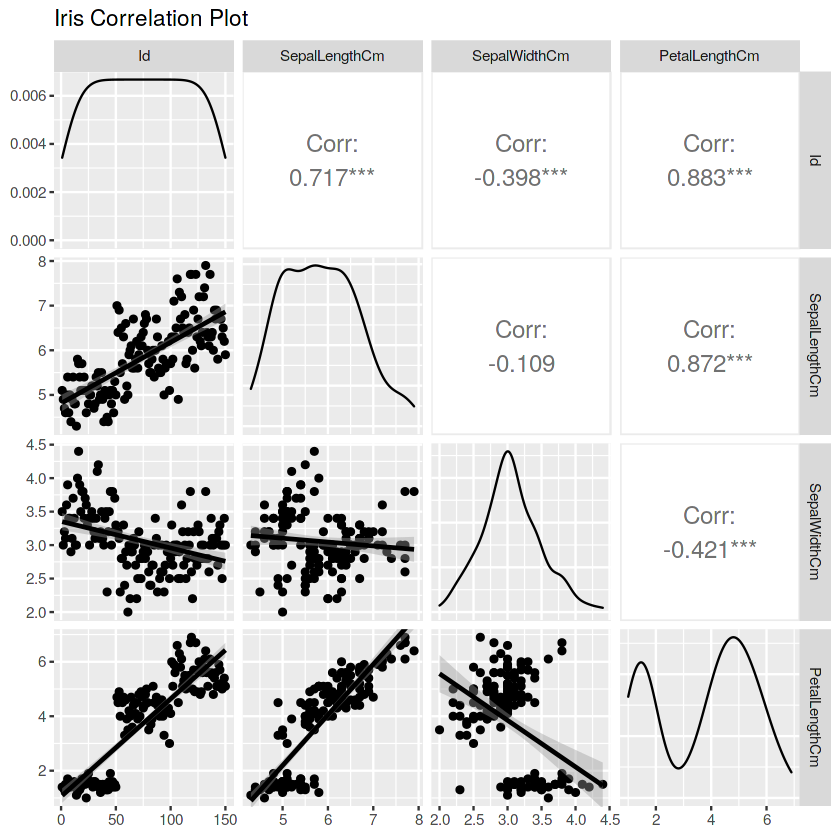

In [9]:

# Based on all the plots we have done we can see there is certain correlation. Let's take a look at the pairwise correlation numerical values to 
# ascertain the relationships in more detail.

library(GGally)
ggpairs(data = iris[1:4],
        title = "Iris Correlation Plot",
        upper = list(continuous = wrap("cor", size = 5)), 
        lower = list(continuous = "smooth")
)

In [10]:
# The examination of the plot revelas a strong correlation between the variables Petal Width and the Petal Length (96%) as well as
# The Sepal Length and Petal Length (87%).


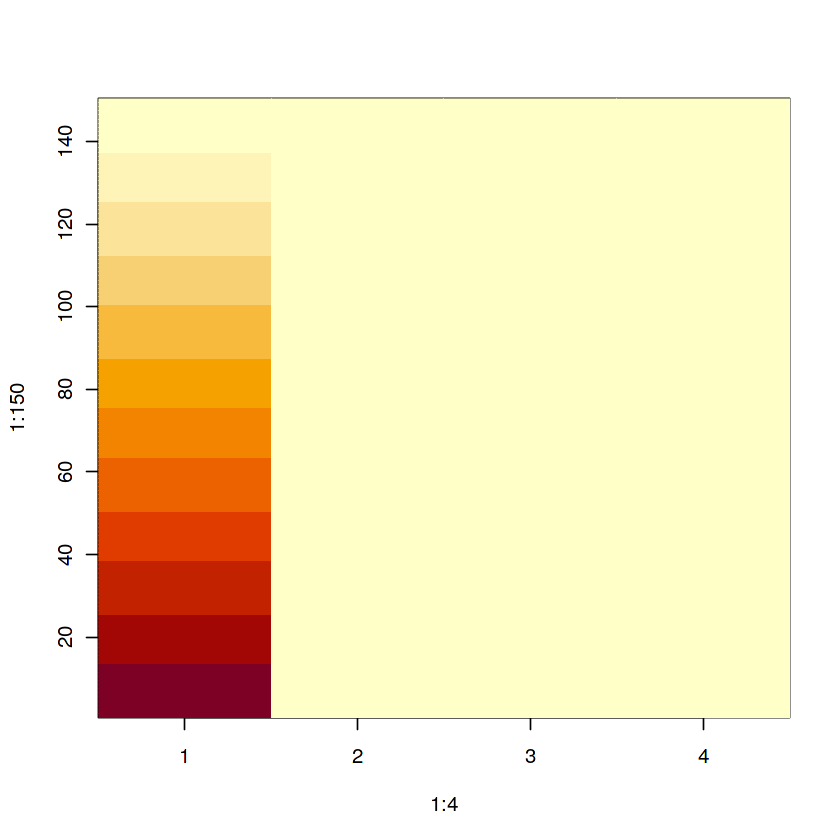

In [11]:

# The heatmat is another useful exploratory plot. It is like a two dimentional histogram and it works by using color
# intensity to represent how large the data value is. The brighter the color the larger the value.
# For example the color white represents the largest value while the red represent the smallest one 
# with different colors which represent the different values in betwwen. 

# Let's Ccreate the matrix and transpose it before using it for the heatmap to 
# ensure the columns corresponds to the features and the rows correspond to the observations.

irisMatix <- as.matrix(iris[1:150, 1:4])
irisTransposedMatrix <- t(irisMatix)[,nrow(irisMatix):1]

image(1:4, 1:150, irisTransposedMatrix)

In [12]:
# Summary
# I hope you liked this introductory explanation about visualizing the iris dataset with R. 
# You can run this examples yourself an improve on them. 
# You can also apply these visualization methods to other datasets as well. 
# You can find many good datasets on the Kaggle Datasets page.